In [2]:
import pandas as pd
import io
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
print ('Succesfull')

Succesfull


In [5]:
app_train = pd.read_csv('F:/Project/application_train.csv')
app_test = pd.read_csv('F:/Project/application_test.csv')

print('Training data shape: ', app_train.shape)
print('Testing data shape: ', app_test.shape)

Training data shape:  (307511, 122)
Testing data shape:  (48744, 121)


In [6]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_count = 0

In [8]:
# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1

In [9]:
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [10]:
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

In [11]:
print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


In [12]:
train_labels = app_train['TARGET']
train_sk_id_curr = app_train['SK_ID_CURR']
test_sk_id_curr = app_test['SK_ID_CURR']

app_train.drop('SK_ID_CURR', inplace=True, axis=1)
app_test.drop('SK_ID_CURR', inplace=True, axis=1)

app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)
print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 238)
Testing Features shape:  (48744, 238)


In [13]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')
imputer.fit(app_train)
app_train = imputer.transform(app_train)
app_test = imputer.transform(app_test)

C:\Users\nidhi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [15]:
train_labels.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier

In [18]:
X_train, X_test, y_train, y_test = train_test_split(app_train, train_labels,test_size = 0.3, random_state=2019)


In [19]:
# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [20]:
# Train on the training data
random_forest.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   33.6s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=50, verbose=1, warm_start=False)

In [22]:
y_pred = random_forest.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.1s finished


In [23]:
y_pred_prob = random_forest.predict_proba(X_test)[:,1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.0s finished


In [24]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss
print("Confusion matrix:",confusion_matrix(y_test, y_pred))
print("Classification Report",classification_report(y_test, y_pred))
print("Accuracy=",accuracy_score(y_test,y_pred))
print("Log Loss=",log_loss(y_test,y_pred))

Confusion matrix: [[84743     3]
 [ 7496    12]]
Classification Report               precision    recall  f1-score   support

           0       0.92      1.00      0.96     84746
           1       0.80      0.00      0.00      7508

   micro avg       0.92      0.92      0.92     92254
   macro avg       0.86      0.50      0.48     92254
weighted avg       0.91      0.92      0.88     92254

Accuracy= 0.9187135517159147
Log Loss= 2.807534487222533


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.0s finished


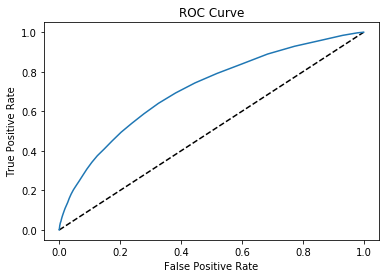

0.7112772925471824

In [25]:
#### ROC####
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = random_forest.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
roc_auc_score(y_test, y_pred_prob)

In [27]:
# Make predictions on the test data
predictions = random_forest.predict_proba(app_test)[:, 1]


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.6s finished


In [32]:
predictions = random_forest.predict(app_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.5s finished


In [33]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
# Make a submission dataframe
submission = pd.DataFrame({'SK_ID_CURR': test_sk_id_curr, 'TARGET': predictions})

In [36]:
submission.head()


,SK_ID_CURR,TARGET
0,100001,0
1,100005,0
2,100013,0
3,100028,0
4,100038,0


In [37]:
submission.to_csv('random_forest_baseline.csv', index = False)

In [40]:
submission['TARGET'].value_counts()

0    48740
1        4
Name: TARGET, dtype: int64